### Linear regression

$$
\begin{split}
y & = w^T x \\
y_i & = \sum^k_{j=1} w_j x_{ij}
\end{split}
$$

> We transpose $$w$$ because by convention we express all vectors as column vectors here.

### Mean square error (MSE)

$$
\begin{split}
J(w) & = \frac{1}{2} \sum^N_{i=1} (w^T x^i - y^i)^2
\end{split}
$$

which $x^i$ and $y^i$ is the input features and the true value for the $i th$ datapoints in the training dataset.

MSE is popular because it is easy to compute and it has a smooth differentiable  To optimize $w$, we take its differentiate.

$$
\begin{split}
\nabla_w J & = \sum^N_{i=1} (w^T x^i - y^i) x^i \\
\nabla_w J & = 0 \\
\implies \sum^N_{i=1} (w^T x^i - y^i) x^i & = 0 \\
w^T &= \frac{\sum^N_{i=1} y^i x^i}{\sum^N_{i=1} \| x^i \|^2} \\
\end{split}
$$

Mean square error (MSE) is actually the L2-norm:

$$
L_2 = \| x \|_2
$$

Since sometimes it is so common, we often drop its subfix.

$$
L_2 = \| x \|
$$

### Adding a bias

$$
y = w x + b
$$

$$
x = \begin{bmatrix}
x^1_1 & x^1_2\\
x^2_1 & x^2_2\\
\end{bmatrix}
$$

Transform x to:

$$
z = \begin{bmatrix}
1 & x^1_1 & x^1_2\\
1 & x^2_1 & x^2_2\\
\end{bmatrix}
$$

$$
y = w z
$$

### Optimize MSE cost

Here we calculate a generic formula to optimize $J$.

$$
\begin{split}
J(w) & = \frac{1}{2} \| xw - y \|_2^2 \\
2 J(w) & = (xw - y)^T (xw - y) \\
& = (w^Tx^T -y^T) (xw - y) \\
& = w^Tx^T (xw - y) - y^T (xw - y) \\
& = w^Tx^Txw - w^Tx^Ty - y^Txw + y^Ty \\
& = w^Tx^Txw - 2 w^Tx^Ty + y^Ty \\
\text{becase } (y^Txw)^T &= w^T(y^Tx)^T = w^Tx^Ty \\
\end{split}
$$

Setting $ \nabla_w J = 0$ to optimize $J$:

$$
\begin{split}
\nabla_w J = \nabla_w (w^Tx^Txw - 2 w^Tx^Ty + y^Ty) & = 0 \\
\nabla_w (w^Tx^Txw) - 2 \nabla_w (w^Tx^Ty) + \nabla_w (y^Ty) & = 0 \\
\nabla_w (w^T(x^Tx)w) - 2 x^Ty - 0 & = 0 \\
2 (x^Tx) w - 2 x^Ty - 0 & = 0 \\
(x^Tx) w & =  x^Ty
\end{split}
$$

In the following equation, we can solve $x$ using linear algebra:

$$
Ax = b \\
$$

We will adopt the following notation saying $x$ is computed by linear algebra using $A$ and $b$:

$$
x = A \setminus b
$$

Recall 

$$ (x^Tx) w  =  x^Ty$$ 

$w$ can therefore be solved by:

> $$ w = x^Tx \setminus x^Ty $$

Notice that the solution for $w$ are not unique.

MSE is also vulnerable to outlier. With an outlier, our model is shifted from the blue line to the red line which the blue line can model the training dataset better if the outlier is not there.

<img src="images/L2p.png" style="border:none;width:35%">

### L2 regularization with mean square error (MSE)

To avoid overfitting, we use L2-norm as a regularization to the cost function $J$. (With the MSE computed in the previous section)

$$
\begin{split}
J(W) & = \frac{1}{2} \| xw - y \|^2 + \frac{\lambda}{2} w w^T \\
\nabla_w J & = x^Txw - x^Ty + \lambda w \\
\end{split}
$$

Optimize $J$:

$$
\begin{split}
\nabla_w J &= 0 \\
x^Txw - x^Ty + \lambda w  &= 0 \\
x^Txw + \lambda w  &= x^Ty 0 \\
(x^Tx + \lambda I) w &= x^T y \\
 w & = (x^Tx + \lambda I)^{-1} x^T y
\end{split}
$$

With L2 normalization and MSE, $w$ is:

> $$  w = (x^Tx + \lambda I)^{-1} x^T y $$


Let's visualize the solution. In the diagram below, $ W^*_a$ is where regularization cost is 0. i.e. all $w_i = 0$$.  W^*_b $ is where MSE is minimum. The optimal solution for $J$ is where the concentric circle meet with the eclipse $W^*$. 

<div class="imgcap">
<img src="images/l2.png" style="border:none;width:35%">
</div>

> This is also called **ridge regression**.

## Frequentist view of Linear Regression
We could write the regression target of the above model as the predicted value plus some error:

$$
\begin{split}
\hat{y}& = y + \epsilon \\
       & = W^Tx + \epsilon
\end{split}
$$
or equivalently, we could say that the error is:

$$\epsilon = \hat{y} - y$$

Now, let’s say we model the regression target as a Gaussian random variable, i.e. $ y \sim N(\mu, \sigma^2) $, with $ \mu = y = W^Tx $, the prediction of our model. Formally:

$$P(\hat{y} \vert x, W) = N(\hat{y} \vert W^Tx, \sigma^2)$$

Then, to find the optimum $ W $, we could use Maximum Likelihood Estimation (MLE). As the above model is a likelihood, i.e. describing our data $ y $ under parameter $ W $, we will do MLE on that:

$$W_{MLE} = \mathop{\rm arg\,max}\limits_{W} N(\hat{y} \vert W^Tx, \sigma^2)$$

The PDF of Gaussian is given by:

$$P(\hat{y} \vert x, W) = \frac{1}{\sqrt{2 \sigma^2 \pi}} \, \exp \left( -\frac{(\hat{y} - W^Tx)^2}{2 \sigma^2} \right)$$

As we are doing maximization, we could ignore the normalizing constant of the likelihood. Hence:

$$W_{MLE} = \mathop{\rm arg\,max}\limits_{W} \, \exp \left( -\frac{(\hat{y} - W^Tx)^2}{2 \sigma^2} \right)$$

As always, it is easier to optimize the log likelihood:

$$
\begin{split}
W_{MLE} &= \mathop{\rm arg\,max}\limits_{W} \\
        &= \mathop{\rm arg\,max}\limits_{W} -\frac{1}{2 \sigma^2}(\hat{y} - W^Tx)^2\\
        &= \mathop{\rm arg\,min}\limits_{W} \frac{1}{2 \sigma^2}(\hat{y} - W^Tx)^2\\
\end{split}
$$

For simplicity, let’s say $ \sigma^2 = 1 $, then:

$$
\begin{split}
W_{MLE} &= \mathop{\rm arg\,min}\limits_{W} \frac{1}{2} (\hat{y} - W^Tx)^2
        &= \mathop{\rm arg\,min}\limits_{W} \frac{1}{2} \sum_i (\hat{y}_i - W_i x_i)^2
        &= \mathop{\rm arg\,min}\limits_{W} \frac{1}{2} \Vert \hat{y} - W^Tx \Vert^2_2
\end{split}
$$

So we see, doing MLE on Gaussian likelihood is equal to Linear Regression!

# Examples

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.nn import Module

torch.set_default_dtype(torch.float64)

In [25]:
num_inputs = 2
num_examples = 1000
true_w = np.array([2, -3.4])
true_b = 4.2
features = np.random.normal(scale=1, size=(num_examples, num_inputs))
labels = np.dot(features, true_w) + true_b
labels += np.random.normal(scale=0.01, size=labels.shape)

np.shape(features)

(1000, 2)

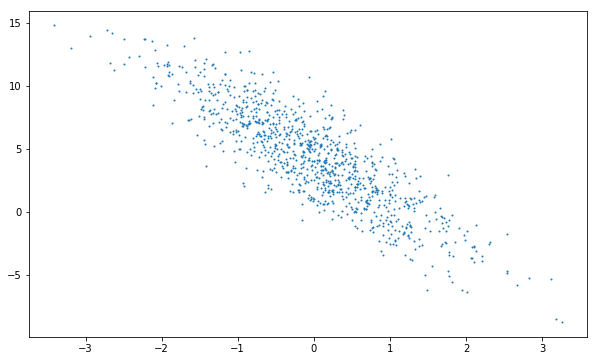

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(features[:, 1], labels, 1);

In [31]:
# Create data splits
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=1234)
print ("X_train:", x_train.shape)
print ("y_train:", y_train.shape)
print ("X_test:", x_test.shape)
print ("y_test:", y_test.shape)

X_train: (750, 2)
y_train: (750,)
X_test: (250, 2)
y_test: (250,)


In [32]:
y_train = y_train.reshape(-1, 1)
np.shape(y_train)

(750, 1)

### PyTorch

Epoch [5/60], Loss: 29.8318
Epoch [10/60], Loss: 29.2155
Epoch [15/60], Loss: 28.6119
Epoch [20/60], Loss: 28.0207
Epoch [25/60], Loss: 27.4418
Epoch [30/60], Loss: 26.8749
Epoch [35/60], Loss: 26.3197
Epoch [40/60], Loss: 25.7759
Epoch [45/60], Loss: 25.2434
Epoch [50/60], Loss: 24.7218
Epoch [55/60], Loss: 24.2111
Epoch [60/60], Loss: 23.7109
Final Weights: tensor([[ 0.6530, -0.8771]])
Final Bias: tensor([0.3965])


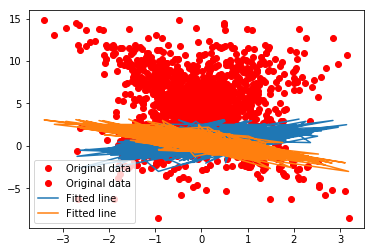

In [33]:
# Model
class LinearModel(Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred



# Hyper-parameters
input_size = 2
output_size = 1
num_epochs = 60
learning_rate = 0.001


# Linear regression model
model = LinearModel()

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Convert numpy arrays to torch tensors
inputs = torch.from_numpy(x_train)
targets = torch.from_numpy(y_train)

# Train the model
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
print ('Final Weights: {}'.format(model.linear.weight.data))
print ('Final Bias: {}'.format(model.linear.bias.data))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()